# <font color="orange" align="center">  
#  <font color="orange" align="center">    Implémentation prediction des symboles arabe utilisant LeNet
## <font color="orange"  align="center">           OUMAYMA BERRAADI SIDSD0028/21
##   <font color="orange" align="center">   FPL

##   importer les bibliothéque  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import time
import pandas as pd

## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Importer Dataset

In [ ]:
%cd /content/drive/My\ Drive/
train_path = './Colab Notebooks/dataset_arabic/train_data'
test_path = './Colab Notebooks/dataset_arabic/test_data'
CATEGORIES=["ي","و","ه","ن","م","ل","ك","ق","ف","غ","ع","ظ","ط","ض","ص","ش","س","ز","ر","ذ","د","خ","ح","ج","ث","ت","ب","أ"]
IMG_SIZE = 32

/content/drive/My Drive


In [ ]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
      path=os.path.join(train_path,category)
      class_num=CATEGORIES.index(category)
      for img in os.listdir( path ):
           try:
              img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
              new_array=cv2.resize(img_array , ( IMG_SIZE ,IMG_SIZE))
              training_data.append([new_array , class_num])
           except Exception as e:
               pass
create_training_data()
print(len(training_data))

13440


In [ ]:
testing_data = []
def create_testing_data():
  for category in CATEGORIES:
      path=os.path.join(test_path,category)
      class_num=CATEGORIES.index(category)
      for img in os.listdir( path ):
           try:
              img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
              new_array=cv2.resize(img_array , ( IMG_SIZE ,IMG_SIZE))
              testing_data.append([new_array , class_num])
           except Exception as e:
               pass
create_testing_data()
print(len(testing_data))

12189


## Prepare DataSet

In [ ]:
# keras importe pour l'ensemble de données et construction de notre réseau neuronal
import keras

# encodage one-hot en utilisant les utilitaires numpy de Keras

random.shuffle(training_data)
random.shuffle(testing_data)

X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train= np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# normaliser les données pour aider à la formation

X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(X_train)

## Create LeNet Model using librairie keras and View Model structure with Summary Function

In [ ]:

model = Sequential()
# C1 Convolutional Layer
model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', strides = 1, activation = 'tanh', input_shape = (32,32,1)))
 
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
 
# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh', padding = 'valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
 
# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh', padding = 'valid'))
 
# Flatten the CNN output to feed it with fully connected layers
model.add(Flatten())
 
# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))
# FC7 Output layer with softmax activation
model.add(Dense(units = 28, activation = 'softmax'))

# en regardant le résumé du modèle
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 120)         48120     
                                                                 
 flatten_3 (Flatten)         (None, 480)              

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

## Compile The Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Trainning and Evaluating The Model Then Save it in file.h5



In [ ]:
model.fit(X_train, y_train ,epochs=100)
val_loss, val_acc = model.evaluate(X_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)
model.save('ARABE_SY_model.h5')

Epoch 1/100
420/420 [==============================] - 13s 30ms/step - loss: 1.9883 - accuracy: 0.4047
Epoch 2/100
420/420 [==============================] - 13s 30ms/step - loss: 1.1766 - accuracy: 0.6391
Epoch 3/100
420/420 [==============================] - 13s 30ms/step - loss: 0.8259 - accuracy: 0.7435
Epoch 4/100
420/420 [==============================] - 13s 31ms/step - loss: 0.6546 - accuracy: 0.7911
Epoch 5/100
420/420 [==============================] - 13s 31ms/step - loss: 0.5290 - accuracy: 0.8332
Epoch 6/100
420/420 [==============================] - 13s 32ms/step - loss: 0.4473 - accuracy: 0.8551
Epoch 7/100
420/420 [==============================] - 13s 30ms/step - loss: 0.3887 - accuracy: 0.8760
Epoch 8/100
420/420 [==============================] - 12s 29ms/step - loss: 0.3332 - accuracy: 0.8925
Epoch 9/100
420/420 [==============================] - 12s 29ms/step - loss: 0.2958 - accuracy: 0.9068
Epoch 10/100
420/420 [==============================] - 12s 28ms/step - l

## Load the Model with load_model Function

In [ ]:
model=load_model('ARABE_SY_model.h5')

## Upload the photo From Drive

In [ ]:
%cd /content/drive/My\ Drive/
img_array=cv2.imread('id_1_label_1.png',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array , ( 32 ,32))

/content/drive/My Drive


## Do the Predict of image with Model .h5

In [ ]:
pred = model.predict(np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1))

## Show the Categorie of higher predict of image

أ


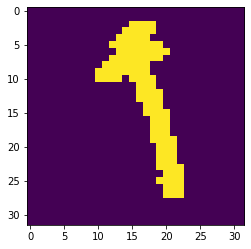

In [ ]:
prediction_max = np.argmax(pred[0,:])    
print(CATEGORIES[prediction_max] ) 
plt.imshow(img_array)

/content/drive/My Drive
ي


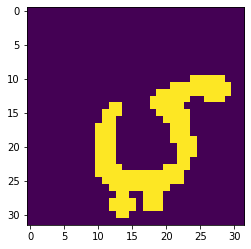

In [ ]:
%cd /content/drive/My\ Drive/
img_array=cv2.imread('id_217_label_28.png',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array , ( 32 ,32))
pred = model.predict(np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1))
prediction_max = np.argmax(pred[0,:])    
print(CATEGORIES[prediction_max])  
plt.imshow(img_array)

/content/drive/My Drive
ف


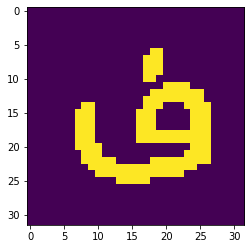

In [ ]:
%cd /content/drive/My\ Drive/
img_array=cv2.imread('id_153_label_20.png',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array , ( 32 ,32))
pred = model.predict(np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1))
prediction_max = np.argmax(pred[0,:])    
print(CATEGORIES[prediction_max] ) 
plt.imshow(img_array)

/content/drive/My Drive
ج


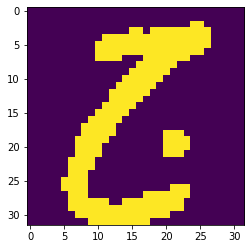

In [ ]:
%cd /content/drive/My\ Drive/
img_array=cv2.imread('id_258_label_5.png',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array , ( 32 ,32))
pred = model.predict(np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1))
prediction_max = np.argmax(pred[0,:])    
print(CATEGORIES[prediction_max])
plt.imshow(img_array)  

/content/drive/My Drive
ح


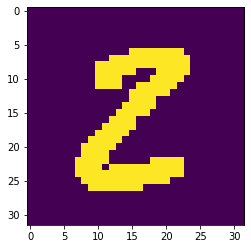

In [ ]:
%cd /content/drive/My\ Drive/
img_array=cv2.imread('id_41_label_6.png',cv2.IMREAD_GRAYSCALE)
new_array=cv2.resize(img_array , ( 32 ,32))
pred = model.predict(np.array(new_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1))
prediction_max = np.argmax(pred[0,:])    
print(CATEGORIES[prediction_max]  )
plt.imshow(img_array)  